In [22]:
from astropy.io import fits
import math
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import random
import scipy.stats as stats
import scipy.special as special
import emcee
import corner
import math


hdu=fits.open( 'outerdisk_sample.fits' )
hdu.info()
print(hdu[1].header)
r=hdu[1].data.field('rgc')
rv=hdu[1].data.field('rv')
rv_err=hdu[1].data.field('rv_err')
nansr = np.isnan(r)
rv = np.delete(rv, np.where(nansr))
rv_err= np.delete(rv_err, np.where(nansr))
r= np.delete(r, np.where(nansr))
m=np.mean(rv)
print(m)

def wudibaolongzhansheng(x,rv,rv_err,r):
    a=x[0]
    hr=x[1]
    dr = abs((r - 8.34) * 0.2)
    r0=stats.norm.rvs(loc=r, scale=dr, size=len(r))
    sig2=a*np.exp(-r0/hr)
    sig2z=abs(sig2+(rv_err**2))
    L = np.sum(-((rv-6.17)**2)/(2*sig2z)-0.5*np.log(sig2z))
    if hr<10:
        return -1000000
    else:
        return L



Filename: outerdisk_sample.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (10006,)   uint8   
  1  Joined        1 BinTableHDU     75   23983R x 18C   [E, E, E, E, E, E, D, D, D, D, D, D, D, D, D, D, D, L]   
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional table                            NAXIS1  =                  113 / width of table in bytes                        NAXIS2  =                23983 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group                                 TFIELDS =                   18 / number of columns                              EXTNAME = 'Joined  '           / table name                                     TTYPE1  =

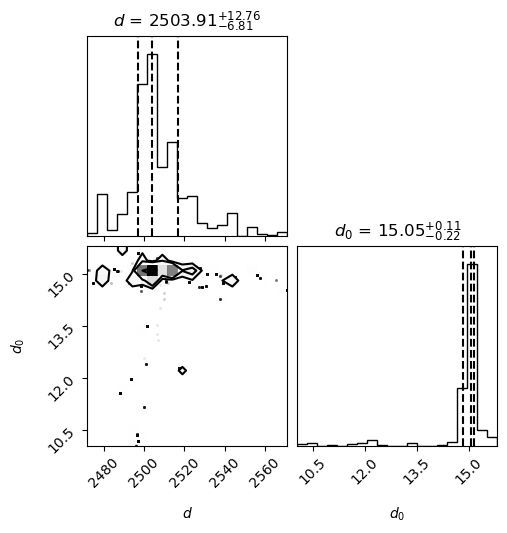

In [24]:
nwalker = 30
ndim = 2
p0 = np.zeros((nwalker,ndim))
pos = np.random.randn(nwalker, ndim)
p0[:,0] = np.random.rand(nwalker)*10+2500
p0[:,1] = np.random.rand(nwalker)*0.1+15

sampler = emcee.EnsembleSampler(nwalker, ndim, wudibaolongzhansheng,args=[rv_err,rv,r])
pos,prob,stat = sampler.run_mcmc(p0,100)
sampler.reset()
sampler.run_mcmc(pos,500)
samples = sampler.chain[:, :, :].reshape((-1, ndim))
fig = corner.corner(samples,\
    labels=[r'$d$',r'$d_0$'],\
        quantiles=[0.16, 0.5, 0.84],\
        show_titles=True, \
        title_kwargs={"fontsize": 12})